# Basic Quantum Operations

 In this notebook we will go into the different operations that are available in QISKit-core. These are:
* Single-qubit quantum gates
* Multi-qubit quantum gates
* Measurements
* Reset
* Conditionals
* State initialization

We will also show you how to use the three different simulators:
* local_unitrary_simulator
* local_qasm_simulator
* local_statevector_simulator

In [1]:
import sys, getpass
try:
    sys.path.append("../../") # go to parent dir
    import Qconfig
    qx_config = {
        "APItoken": Qconfig.APItoken,
        "url": Qconfig.config['url']}
    print('Qconfig loaded from %s.' % Qconfig.__file__)
except:
    APItoken = getpass.getpass('Please input your token and hit enter: ')
    qx_config = {
        "APItoken": APItoken,
        "url":"https://quantumexperience.ng.bluemix.net/api"}
    print('Qconfig.py not found in qiskit-tutorial directory; Qconfig loaded using user input.')

Please input your token and hit enter: ········
Qconfig.py not found in qiskit-tutorial directory; Qconfig loaded using user input.


In [2]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QISKitError
from qiskit import available_backends, execute, register, get_backend
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.qi.qi import state_fidelity

## Single Qubit Quantum states

A single qubit quantum state can be written as

$$|\psi\rangle = \alpha|0\rangle + \beta |1\rangle$$


where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the bit being in $|0\rangle$ is $|\alpha|^2$ and $|1\rangle$ is $|\beta|^2$. As a vector this is

$$
|\psi\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Note due to conservation probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable $|\psi\rangle := e^{i\delta} |\psi\rangle$ we only requires two real numbers to describe a single qubit quantum state.

A convenient representation is

$$|\psi\rangle = \cos(\theta/2)|0\rangle + \sin(\theta/2)e^{i\phi}|1\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  From this it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

Quantum gates/operations are usually represented as matrices. A gate which acts on a qubit is represented by a $2\times 2$ unitary matrix $U$. The action of the quantum gate is found by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$|\psi'\rangle = U|\psi\rangle$$

A general unitary must be able to take the $|0\rangle$ to the above state. That is 

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving 

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

This is the most general form of a single qubit unitary.

## Single-Qubit Gates

The single-qubit gates available are:
* u gates
* Identity gate
* Pauli gates
* Cliffords gates
* $C3$ gates
* Standard rotation gates 

We have provided a backend: `local_unitary_simulator` to allow you to calculate the unitary matrices. 

In [4]:
q = QuantumRegister(1)

### u gates

In QISKit we give you access to the general unitary using the $u3$ gate

$$
u3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda) 
$$


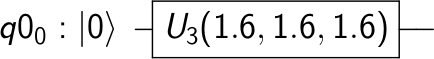

In [5]:
qc = QuantumCircuit(q)
qc.u3(pi/2,pi/2,pi/2,q)
circuit_drawer(qc)

In [6]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

The $u2(\phi, \lambda) =u3(\pi/2, \phi, \lambda)$ has the martix form

$$
u2(\phi, \lambda) = 
\frac{1}{\sqrt{2}} \begin{pmatrix}
1 & -e^{i\lambda} \\
e^{i\phi} & e^{i(\phi + \lambda)}
\end{pmatrix}.
$$

This is a useful gate as it allows us to create superpositions

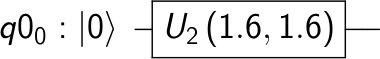

In [7]:
qc = QuantumCircuit(q)
qc.u2(pi/2,pi/2,q)
circuit_drawer(qc)

In [8]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

The $u1(\lambda)= u3(0, 0, \lambda)$ gate has the matrix form

$$
u1(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
$$

which is a useful as it allows us to apply a quantum phase.

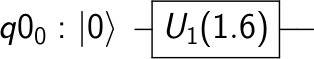

In [9]:
qc = QuantumCircuit(q)
qc.u1(pi/2,q)
circuit_drawer(qc)

In [10]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

The $u0(\delta)= u3(0, 0, 0)$ gate is the identity matrix. It has the matrix form

$$
u0(\delta) = 
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}.
$$

The identity gate does nothing (but can add noise in the real device for a period of time equal to fractions of the single qubit gate time)

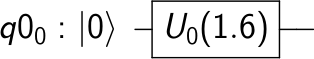

In [11]:
qc = QuantumCircuit(q)
qc.u0(pi/2,q)
circuit_drawer(qc)

In [12]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

### Identity gate

The identity gate is $Id = u0(1)$.

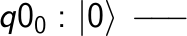

In [13]:
qc = QuantumCircuit(q)
qc.iden(q)
circuit_drawer(qc)

In [14]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

### Pauli gates

#### $X$: bit-flip gate

The bit-flip gate $X$ is defined as:

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u3(\pi,0,\pi)
$$

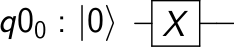

In [15]:
qc = QuantumCircuit(q)
qc.x(q)
circuit_drawer(qc)

In [16]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[ 0.+0.j,  1.-0.j],
       [ 1.+0.j, -0.+0.j]])

#### $Y$: bit- and phase-flip gate

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u3(\pi,\pi/2,\pi/2)
$$

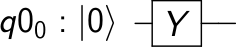

In [17]:
qc = QuantumCircuit(q)
qc.y(q)
circuit_drawer(qc)

In [18]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j, -0.+0.j]])

#### $Z$: phase-flip gate

The phase flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=u1(\pi)
$$

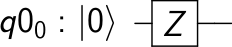

In [19]:
qc = QuantumCircuit(q)
qc.z(q)
circuit_drawer(qc)

In [20]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

### Clifford gates

#### Hadamard gate

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u2(0,\pi)
$$

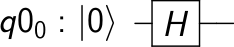

In [21]:
qc = QuantumCircuit(q)
qc.h(q)
circuit_drawer(qc)

In [22]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

#### $S$ (or, $\sqrt{Z}$ phase) gate

$$
S = 
\begin{pmatrix}
1 & 0\\
0 & i
\end{pmatrix}= u1(\pi/2)
$$

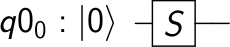

In [23]:
qc = QuantumCircuit(q)
qc.s(q)
circuit_drawer(qc)

In [24]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

#### $S^{\dagger}$ (or, conjugate of $\sqrt{Z}$ phase) gate

$$
S^{\dagger} = 
\begin{pmatrix}
1 & 0\\
0 & -i
\end{pmatrix}= u1(-\pi/2)
$$


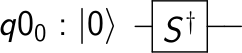

In [25]:
qc = QuantumCircuit(q)
qc.sdg(q)
circuit_drawer(qc)

In [26]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.-1.j]])

### $C3$ gates
#### $T$ (or, $\sqrt{S}$ phase) gate

$$
T = 
\begin{pmatrix}
1 & 0\\
0 & e^{i \pi/4}
\end{pmatrix}= u1(\pi/4) 
$$

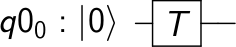

In [27]:
qc = QuantumCircuit(q)
qc.t(q)
circuit_drawer(qc)

In [28]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

#### $T^{\dagger}$ (or, conjugate of $\sqrt{S}$ phase) gate

$$
T^{\dagger} =  
\begin{pmatrix}
1 & 0\\
0 & e^{-i \pi/4}
\end{pmatrix}= u1(-pi/4)
$$

They can be added as below.

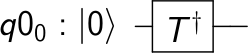

In [29]:
qc = QuantumCircuit(q)
qc.tdg(q)
circuit_drawer(qc)

In [30]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j]])

### Standard Rotations

The standard rotation gates are those that define rotations around the Paulis $P=\{X,Y,Z\}$. They are defined as 

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

#### Rotation around X-axis

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u3(\theta, -\pi/2,\pi/2)
$$

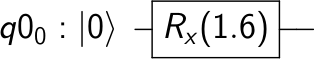

In [31]:
qc = QuantumCircuit(q)
qc.rx(pi/2,q)
circuit_drawer(qc)

In [32]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   -0.707j,  0.707+0.j   ]])

#### Rotation round Y-axis

$$
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} =u3(\theta,0,0)
$$

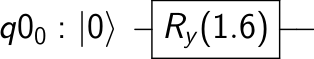

In [33]:
qc = QuantumCircuit(q)
qc.ry(pi/2,q)
circuit_drawer(qc)

In [34]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

#### Rotation around Z-axis

$$
R_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv u1(\phi)
$$

Note here we have used an equivalent as is different to u1 by global phase $e^{-i \phi/2}$.

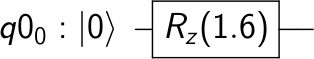

In [35]:
qc = QuantumCircuit(q)
qc.rz(pi/2,q)
circuit_drawer(qc)

In [36]:
job = execute(qc, backend='local_unitary_simulator')
np.round(job.result().get_data(qc)['unitary'], 3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

Note this is different due only to a global phase